In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve


In [3]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df = df.drop(["trestbps"],axis=1)
df

,age,sex,cp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df = df.drop(["restecg"],axis=1)
df

,age,sex,cp,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,233,1,150,0,2.3,0,0,1,1
1,37,1,2,250,0,187,0,3.5,0,0,2,1
2,41,0,1,204,0,172,0,1.4,2,0,2,1
3,56,1,1,236,0,178,0,0.8,2,0,2,1
4,57,0,0,354,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,123,1,0.2,1,0,3,0
299,45,1,3,264,0,132,0,1.2,1,0,3,0
300,68,1,0,193,1,141,0,3.4,1,2,3,0
301,57,1,0,131,0,115,1,1.2,1,1,3,0


In [6]:
df_temp = df

In [7]:
df_temp

,age,sex,cp,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,233,1,150,0,2.3,0,0,1,1
1,37,1,2,250,0,187,0,3.5,0,0,2,1
2,41,0,1,204,0,172,0,1.4,2,0,2,1
3,56,1,1,236,0,178,0,0.8,2,0,2,1
4,57,0,0,354,0,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,241,0,123,1,0.2,1,0,3,0
299,45,1,3,264,0,132,0,1.2,1,0,3,0
300,68,1,0,193,1,141,0,3.4,1,2,3,0
301,57,1,0,131,0,115,1,1.2,1,1,3,0


In [19]:
np.random.seed(42)
clf = RandomForestClassifier()
X = df.drop(["target"],axis=1)
y= df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

clf.fit(X_train,y_train)
y_preds= clf.predict(X_test)
clf.score(X_test,y_test)

0.8688524590163934

In [20]:
np.random.seed(42)
clf = KNeighborsClassifier()
X = df.drop(["target"],axis=1)
y= df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

clf.fit(X_train,y_train)
y_preds= clf.predict(X_test)
clf.score(X_test,y_test)

0.6557377049180327

In [21]:
np.random.seed(42)
clf = LogisticRegression()
X = df.drop(["target"],axis=1)
y= df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

clf.fit(X_train,y_train)
y_preds= clf.predict(X_test)
clf.score(X_test,y_test)

/Users/sunnykotwal/Documents/sample_project/env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8688524590163934

In [22]:
np.random.seed(42)
train_scores=[]
test_scores=[]
neighbors = range(1,21)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [23]:
test_scores

[0.6557377049180327,
 0.639344262295082,
 0.6885245901639344,
 0.6229508196721312,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7213114754098361]

In [24]:
max(test_scores) #20 so 20 types for knn

0.7704918032786885

In [25]:
log_reg_grid = {"C":np.logspace(-4,4,20),
                 "solver":["liblinear"]}
rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

In [26]:
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,
                                 cv=5,n_iter=20,verbose=True )
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [28]:
rs_log_reg.score(X_test,y_test)

0.8524590163934426

In [29]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,
                            cv=5,n_iter=20,verbose=True)
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 12,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [31]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [4]:
np.random.seed(42)
clf = RandomForestClassifier()
X = df.drop(["target"],axis=1)
y= df.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)



In [5]:
rf_grid = {"n_estimators": np.arange(10,1000,100),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,4),
           "min_samples_leaf":np.arange(1,20,4)}

In [6]:
gs_rf= GridSearchCV(estimator = clf,param_grid=rf_grid,
                               cv=3,verbose = 2)
gs_rf.fit(X_train,y_train)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END ma

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=910; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=10, n_estimators=910; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=14, 

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=610; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estim

[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=1

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=2, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=6, 

[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=610; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=610; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=610; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=710; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=13, min_sampl

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=210; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=310; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=

[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=810; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=910; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=910; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=14, n_estimators=910; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=810; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=810; total time=   0.9s


[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=18, n_estimators=510; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=10, n_estimators=410; total tim

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=810; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   1.5s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=2, n_estimators=110; total time=   0.1s

[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=610; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=10, n_estimators=910; total tim

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=310; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=410; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=410; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=510; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=610; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=2, n_estimators=610; total tim

[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=310; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=410; total time=   0.5s
[CV] END max_depth=3, min_samples_leaf=13, min_samples_split=14, n_estimators=410;

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=810; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=810; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=2, n_estimators=910; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=6, n_estimators=110; total time= 

[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=610; total time=   0.7s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=710; total time=   0.8s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=810; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=17, min_samples_split=14, n_estimators=810;

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=310; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=6, n_estimators=510; total time=   0.6s


[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=410; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=18, n_estimators=410; total tim

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=810; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=6, n_estimators=910; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=110; total time=   0.

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=610; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=610; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=610; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=710; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=710; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=710; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=810; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=810; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=810; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=18, n_estimators=910; total tim

[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=510; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=610; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=9, min_samples_split=10, n_estimators=610; total tim

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=210; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=310; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=410; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=2, n_estimators=410; total tim

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=810; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=910; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=110; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=14, n_estimators=110; to

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=610; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=610; total time=   0.7s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=610; total time=   0.6s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=710; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=810; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=2, n_estimators=810; total tim

[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=210; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=310; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=310; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=410; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=410; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=410; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=17, min_samples_split=14, n_estimators=510;

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=6, n_estimators=210; total time= 

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=14, n_estimators=910;

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=610; total tim

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=18, n_estimators=410;

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=810; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=6, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=10, n_estimators=110; total ti

[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=610; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=9, min_samples_split=18, n_estimators=810;

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=210; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=310; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=410; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estimators=410; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=10, n_estim

[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=18, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=18, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=18, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=13, min_samples_split=18, n_estimators=910; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=2, n_estimators=110; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=2, n_estimators=110

[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=510; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=610; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=610; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=610; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=710; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=710; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=710; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estimators=810; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=17, min_samples_split=10, n_estim

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])},
             verbose=2)

In [7]:
gs_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'n_estimators': 810}

In [8]:
gs_rf.score(X_test,y_test)

0.8688524590163934

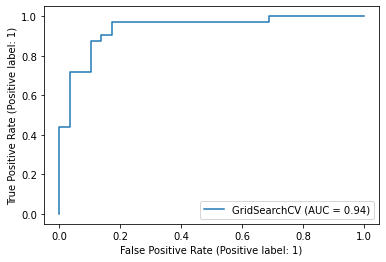

In [9]:
plot_roc_curve(gs_rf,X_test,y_test)

In [11]:
y_preds = gs_rf.predict(X_test)

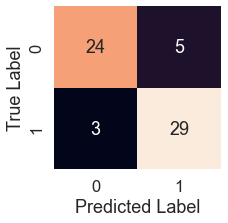

In [12]:
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
plot_confusion_matrix(y_test,y_preds)

In [13]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

